In [160]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

image_path = './images'

In [271]:
def skinDetectionHSV(img, lb, ub):
    # Convert img to HSV
    imgHSV = cv.cvtColor(img, cv.COLOR_BGR2HSV)

    # Boundaries for the HSV colorspace
    lowerBoundHSV = lb
    upperBoundHSV = ub

    # Create mask
    mask = cv.inRange(imgHSV, lowerBoundHSV, upperBoundHSV)


    # invert the mask
    mask = 255-mask

    # Apply mask to original image
    imgMasked = cv.bitwise_and(img, img, mask=mask)
    
    

    # Show image
    # cv.imshow('Original', img)
    # cv.imshow('Mask', mask)
    # cv.imshow('Masked Image', imgMasked)

    return imgMasked

def skinDetectionYCC(img, pos, neg):
    # Convert img to YCrCb
    imgYCC = cv.cvtColor(img, cv.COLOR_BGR2YCrCb)

    plb, pub = pos

    # Boundaries for the YCrCb colorspace
    lowerBoundYCC = np.array(plb)
    upperBoundYCC = np.array(pub)

    # Create mask
    mask = cv.inRange(imgYCC, lowerBoundYCC, upperBoundYCC)

    # denoise mask
    kernel = np.ones((5,5),np.uint8)
    mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)

    nlb, nub = neg

    # Boundaries for the YCrCb colorspace
    lowerBoundYCC = np.array(nlb)
    upperBoundYCC = np.array(nub)

    # Create mask
    mask2 = cv.inRange(imgYCC, lowerBoundYCC, upperBoundYCC)

    # invert the mask
    mask2 = 255-mask2

    # join masks
    mask = mask + mask2

    # Apply mask to original image
    imgMasked = cv.bitwise_and(img, img, mask=mask)

    # Show image
    cv.imshow('Original', img)
    cv.imshow('Mask', mask)
    cv.imshow('Masked Image', imgMasked)

    return imgMasked

def calcPrecision(img, gt):
    # Convert to grayscale
    imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    gtGray = cv.cvtColor(gt, cv.COLOR_BGR2GRAY)

    # Thresholding
    ret, imgThresh = cv.threshold(imgGray, 0, 255, cv.THRESH_BINARY)
    ret, gtThresh = cv.threshold(gtGray, 0, 255, cv.THRESH_BINARY)

    # Calculate precision

    tp, tn = cv.countNonZero(imgThresh & gtThresh), cv.countNonZero(~imgThresh & ~gtThresh)
    fp, fn = cv.countNonZero(imgThresh & ~gtThresh), cv.countNonZero(~imgThresh & gtThresh)

    precision = tp / (tp + fp)

    # if cv.countNonZero(imgThresh) == 0:
    #     precision = 0
    # else:
    #     precision = cv.countNonZero(imgThresh & gtThresh) / (cv.countNonZero(imgThresh))
        
    print('Precision: ', precision)

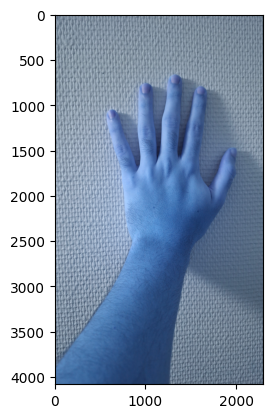

In [260]:
# Read image
img = cv.imread(f'{image_path}/hand1.jpg')
groundTruth = cv.imread(f'{image_path}/hand1_GT.jpg')

# img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)
# plt.imshow(groundTruth)

Precision:  0.9074513366816155


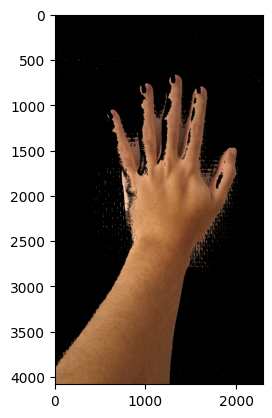

In [261]:
# Apply skin detection
imgSkinHSV = skinDetectionHSV(img, np.array([0, 0, 30]), np.array([20, 110, 245]))
calcPrecision(imgSkinHSV, groundTruth)

imgSkinHSV = cv.cvtColor(imgSkinHSV, cv.COLOR_BGR2RGB)

plt.imshow(imgSkinHSV)

Precision:  0.9600287088870015


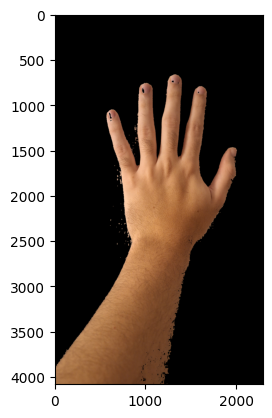

In [254]:
positive = ([0, 0, 0], [255, 255, 109])
negative = ([0, 0, 0], [255, 152, 255])

imgSkinYCC = skinDetectionYCC(img, positive, negative)
calcPrecision(imgSkinYCC, groundTruth)

imgSkinYCC = cv.cvtColor(imgSkinYCC, cv.COLOR_BGR2RGB)

plt.imshow(imgSkinYCC)

In [262]:
# running for the other images

# Read image
img = cv.imread(f'{image_path}/hand2.jpg')
groundTruth = cv.imread(f'{image_path}/hand2_GT.jpg')

Precision:  0.19858959828736936


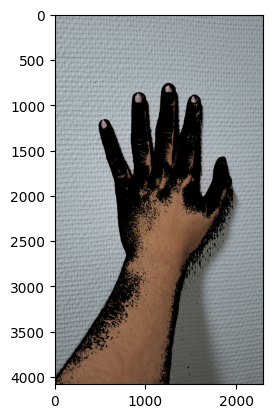

In [263]:
# Apply skin detection
imgSkinHSV = skinDetectionHSV(img, np.array([0, 0, 30]), np.array([20, 110, 245]))
calcPrecision(imgSkinHSV, groundTruth)

imgSkinHSV = cv.cvtColor(imgSkinHSV, cv.COLOR_BGR2RGB)

plt.imshow(imgSkinHSV)

Precision:  1.0


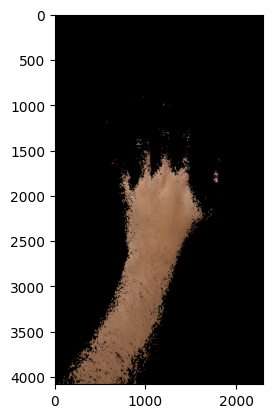

In [258]:
positive = ([0, 0, 0], [255, 255, 109])
negative = ([0, 0, 0], [255, 152, 255])

imgSkinYCC = skinDetectionYCC(img, positive, negative)
calcPrecision(imgSkinYCC, groundTruth)

imgSkinYCC = cv.cvtColor(imgSkinYCC, cv.COLOR_BGR2RGB)

plt.imshow(imgSkinYCC)

In [266]:
# Read image
img = cv.imread(f'{image_path}/hand3.jpg')
groundTruth = cv.imread(f'{image_path}/hand3_GT.jpg')

Precision:  0.937429374170243


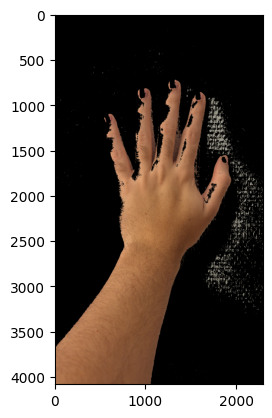

In [267]:
# Apply skin detection
imgSkinHSV = skinDetectionHSV(img, np.array([0, 0, 30]), np.array([20, 110, 245]))
calcPrecision(imgSkinHSV, groundTruth)

imgSkinHSV = cv.cvtColor(imgSkinHSV, cv.COLOR_BGR2RGB)

plt.imshow(imgSkinHSV)

Precision:  0.9763687487189998


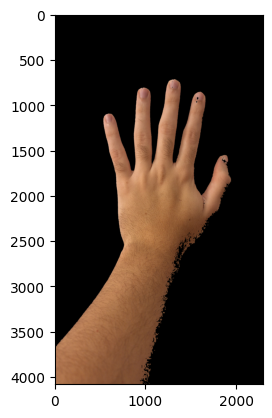

In [272]:
positive = ([0, 0, 0], [255, 255, 109])
negative = ([0, 0, 0], [255, 152, 255])

imgSkinYCC = skinDetectionYCC(img, positive, negative)
calcPrecision(imgSkinYCC, groundTruth)

imgSkinYCC = cv.cvtColor(imgSkinYCC, cv.COLOR_BGR2RGB)

plt.imshow(imgSkinYCC)